In [3]:
import random
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#df = pd.read_csv('../../data/processed/aishub_linear.csv')
df = pd.read_csv('../../data/processed/aishub_linear_artificial_whole.csv')
grp = df.groupby(["traj_id"])
m = folium.Map(location=[53.54, 8.56])

for traj_id in list(df.groupby(["traj_id"]).groups.keys())[100:400]:
    ship = grp.get_group(traj_id)
    coordinates = np.vstack((ship['lat'], ship['lon'])).T
    b = str(hex(random.randint(0,255)))
    r = str(hex(random.randint(0,255)))
    random_color ='#'+ r[2:] + '00' + b[2:]
    line = folium.PolyLine(coordinates,
        weight=1.5,
        opacity=1,
        color=random_color,
    ).add_to(m)
m
#m.save('tracks.html')

In [27]:
df = pd.read_csv('../../data/processed/aishub_linear_artificial_cargo.csv')
grp = df.groupby(["traj_id"])
m = folium.Map(location=[53.54, 8.56])
#print(df.describe())
#print(df.groupby('traj_id').count().shape[0])
#print(df.groupby('mmsi').count().shape[0])

for traj_id in list(df.groupby(["traj_id"]).groups.keys())[500:800]:
    ship = grp.get_group(traj_id)
    coordinates = np.vstack((ship['lat'], ship['lon'])).T
    b = str(hex(random.randint(0,255)))
    r = str(hex(random.randint(0,255)))
    random_color ='#'+ r[2:] + '00' + b[2:]
    line = folium.PolyLine(coordinates,
        weight=1.5,
        opacity=1,
        color=random_color,
    ).add_to(m)
m
#m.save('cargo_partial.html')

In [36]:
agent = np.load('agent.npy')
true = np.load('true.npy')
m = folium.Map(location=[53.54, 8.56])

folium.PolyLine(true,
    weight=2,
    opacity=1,
    color="black",
).add_to(m)

folium.PolyLine(agent,
    weight=2,
    opacity=1,
    color="red",
).add_to(m)
m

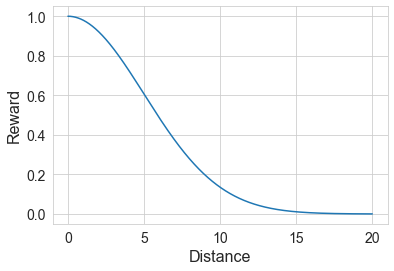

In [265]:
from scipy.stats import norm
import plotting_config
plt.rc('font', family='Helvetica')
x_axis = np.arange(0, 20, 0.001)
# Mean = 0, SD = 2.
sns.set_style("whitegrid")
sns.lineplot(x=x_axis, y=norm.pdf(x_axis,0,5) * 12.5331)
plt.xlabel("Distance")
plt.ylabel("Reward")
plt.savefig("r1.svg", format="svg")

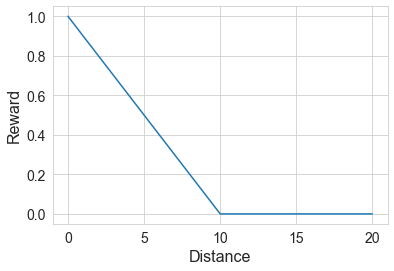

In [54]:
sns.lineplot(x=x_axis, y=np.clip(1-x_axis/10, a_min=0, a_max=1))
plt.xlabel("Distance")
plt.ylabel("Reward")
plt.savefig("r2.svg", format="svg")

[0.00465942]


(-1.0, 1.0)

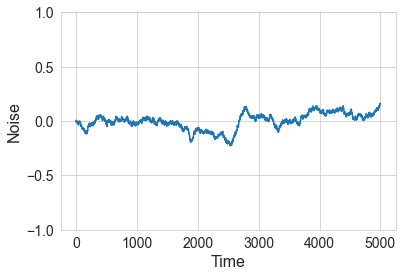

In [280]:
import numpy as np
from stable_baselines3.common.noise import OrnsteinUhlenbeckActionNoise
n = OrnsteinUhlenbeckActionNoise(np.array([0], dtype=np.float64), \
                                 np.array([0.05], dtype=np.float64), \
                                 0.15)
print(n())
noise_values = []
for i in range(0, 5000):
    noise_values.append(n()[0])
sns.lineplot(x=range(0, 5000), y=noise_values)
plt.xlabel("Time")
plt.ylabel("Noise")
plt.ylim((-1,1))
#plt.savefig("ou_03_001.svg", format="svg")